# AIM 511 Tutorial: KMeans and Hierarchical Clustering

## 1. Introduction to Clustering

Clustering is a type of **unsupervised learning** technique that is used to group similar data points together. The goal is to discover natural groupings (clusters) within the dataset, where data points in the same cluster are more similar to each other than to those in other clusters.

### Key Concepts:

- **Unsupervised Learning**: Unlike supervised learning, where we have labeled data (input-output pairs), unsupervised learning deals with unlabeled data. The algorithm tries to learn the structure of the data without any prior knowledge of the "correct" outcomes.
- **Clustering**: Clustering assigns data points into groups (clusters) such that objects in the same cluster are more similar to each other than to those in other clusters. These similarities are often measured by distance metrics like Euclidean distance.

### Why Clustering?

Clustering can be applied in various domains where finding patterns in data is crucial:

- **Customer Segmentation**: Businesses can use clustering to group customers based on purchasing behavior, which helps in targeted marketing.
- **Image Compression**: Grouping similar pixels to reduce image size while maintaining quality.
- **Anomaly Detection**: Clusters can help identify outliers or anomalies that don’t fit into any group.

### Types of Clustering Algorithms:

- **Partition-based Clustering (e.g., KMeans)**: This method divides the dataset into `K` distinct clusters, where each data point belongs to one cluster.
- **Hierarchical Clustering**: This method builds a hierarchy of clusters in a tree-like structure (called a dendrogram). The clusters can be divided (divisive) or merged (agglomerative) to form different levels of grouping.

In this tutorial, we will cover two popular clustering techniques:

1. **KMeans Clustering**: A simple and efficient method that partitions data into `K` clusters.
2. **Hierarchical Clustering**: A method that builds a hierarchy of clusters based on distances between data points.


## 2. KMeans Clustering: Code Implementation

### Implementing from Scratch:


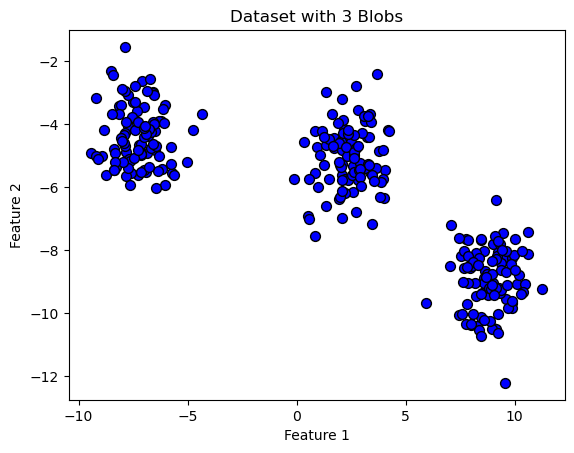

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create a sample dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, n_features=2)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title("Dataset with 3 Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
class KMeansFromScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        """
        Initialize the KMeans class.
        Parameters:
            n_clusters: The number of clusters (k).
            max_iter: Maximum number of iterations.
            tol: Tolerance to check convergence based on change in inertia.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
    
    def initialize_centroids(self, X):
        """
        Randomly initialize centroids from the data points.
        """
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]
    
    def assign_clusters(self, X):
        """
        Assign each point in X to the nearest centroid.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        self.labels = np.argmin(distances, axis=1)
    
    def update_centroids(self, X):
        """
        Update the centroids based on the current cluster assignments.
        """
        new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids
    
    def compute_inertia(self, X):
        """
        Compute the sum of squared distances (inertia) between points and their centroids.
        """
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i]
            inertia += np.sum((cluster_points - self.centroids[i]) ** 2)
        return inertia
    
    def single_iteration(self, X):
        """
        Perform a single iteration: assign clusters and update centroids.
        """
        # Step 1: Assign clusters
        self.assign_clusters(X)
        
        # Step 2: Update centroids
        new_centroids = self.update_centroids(X)
        
        return new_centroids
    
    def plot_clusters(self, X):
        """
        Plot the clusters along with their centroids.
        """
        plt.scatter(X[:, 0], X[:, 1], c=self.labels, cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=200, lw=2)
        plt.title("Clusters and Centroids")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()
    
    def fit(self, X):
        """
        Run the KMeans algorithm until convergence or maximum iterations.
        """
        # Step 1: Initialize centroids
        self.initialize_centroids(X)
        self.inertia = None
        
        for i in range(self.max_iter):
            # Step 2: Perform a single iteration
            new_centroids = self.single_iteration(X)
            
            # Step 3: Compute inertia (sum of squared distances)
            new_inertia = self.compute_inertia(X)
            
            # Step 4: Check for convergence
            if self.inertia is not None and np.abs(self.inertia - new_inertia) <= self.tol:
                print(f"Converged after {i+1} iterations.")
                break
            
            # Step 5: Update centroids and inertia for the next iteration
            self.centroids = new_centroids
            self.inertia = new_inertia
            
            # Optional: Plot clusters at each iteration
            self.plot_clusters(X)


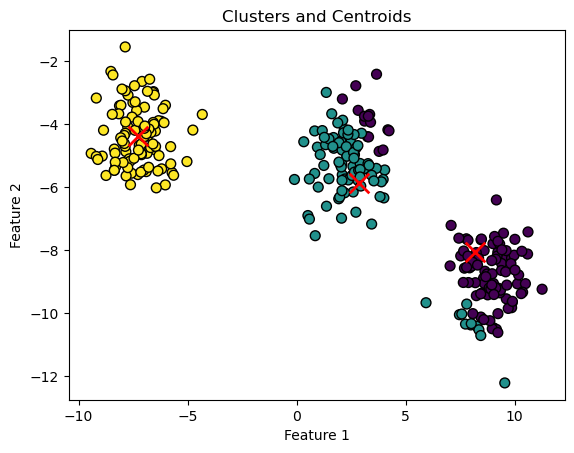

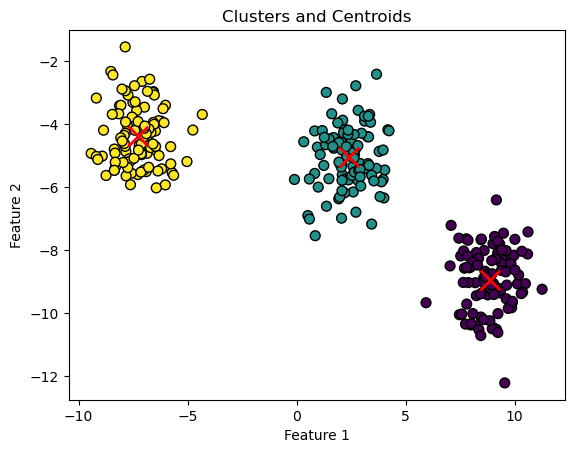

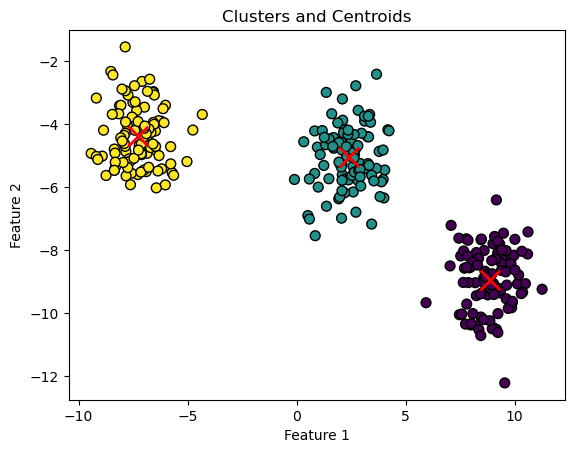

Converged after 4 iterations.


In [17]:
# Instantiate and run the KMeans algorithm
kmeans = KMeansFromScratch(n_clusters=3)
kmeans.fit(X)

In [18]:
# Print the inertia (sum of squared distances to the closest centroid)
print(f"Inertia: {kmeans.inertia}")

Inertia: 540.5367221922102


### Using sklearn API:


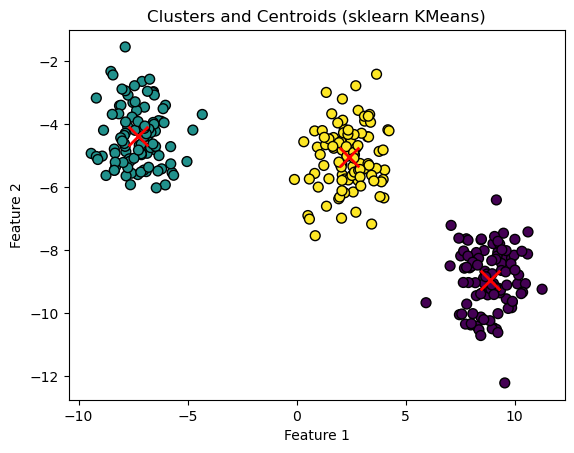

In [19]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Create a KMeans model
sk_kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the dataset
sk_kmeans.fit(X)

# Get the cluster assignments (labels) and centroids
labels = sk_kmeans.labels_
centroids = sk_kmeans.cluster_centers_

# Plot the resulting clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, lw=2)
plt.title("Clusters and Centroids (sklearn KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [20]:
# Print the inertia (sum of squared distances to the closest centroid)
print(f"Inertia: {sk_kmeans.inertia_}")

Inertia: 540.5367221922103


### Choosing the Number of Clusters (K):

Choosing the optimal number of clusters (`K`) is a critical part of the KMeans algorithm. One commonly used method to determine `K` is the **Elbow Method**. The idea is to run KMeans with different values of `K` and plot the sum of squared distances (inertia) for each `K`. The point where the inertia starts decreasing more slowly forms an "elbow," indicating a good value for `K`.


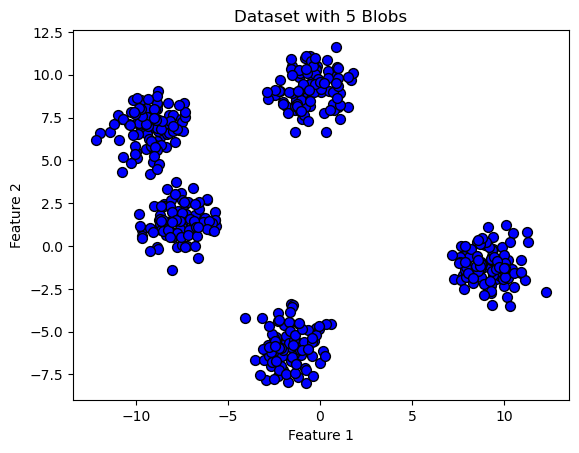

In [31]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create a sample dataset with 5 clusters
X, y = make_blobs(n_samples=500, centers=5, n_features=2)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title("Dataset with 5 Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

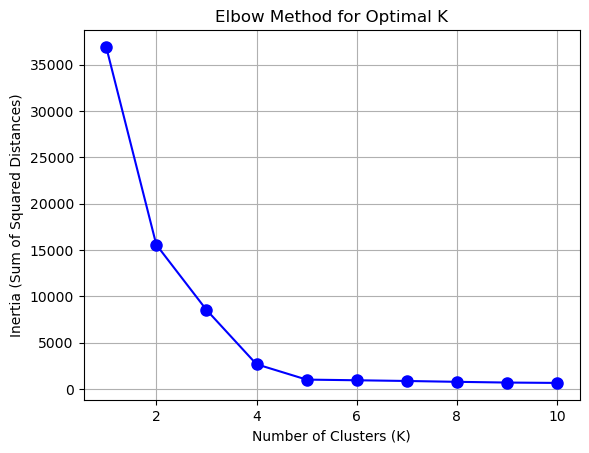

In [32]:
# Define the range for the number of clusters
k_values = range(1, 11)

# Initialize an empty list to store the inertia values for each K
inertia_values = []

# Fit KMeans for each K and store the inertia
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X)
    inertia_values.append(kmeans_model.inertia_)

# Plot the Elbow Method visualization
plt.plot(k_values, inertia_values, 'bo-', markersize=8)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(True)
plt.show()


### Limitations of KMeans

1. **Fixed Number of Clusters (K)**:

   - KMeans requires the user to specify the number of clusters (`K`) in advance. This is often difficult to determine without prior knowledge about the data.

2. **Sensitivity to Initial Centroid Placement**:

   - The final clusters can vary based on the initial placement of the centroids. Poor initialization may lead to suboptimal clusters or slow convergence.
   - The `[k-means++](https://medium.com/@gallettilance/kmeans-from-scratch-24be6bee8021)` initialization method helps mitigate this issue but does not completely eliminate it.

3. **Assumes Spherical Clusters**:

   - KMeans assumes clusters are roughly spherical and equally sized. It performs poorly on non-spherical or elongated clusters and datasets with clusters of varying sizes.

4. **Sensitive to Outliers**:

   - KMeans is sensitive to outliers because it minimizes the sum of squared distances. Outliers can significantly distort the centroids and cluster assignments.

5. **Equal Cluster Sizes**:

   - KMeans tends to divide the data into clusters of roughly equal sizes, even if the true underlying clusters have very different sizes.

6. **Difficulty in Convergence**:
   - KMeans may converge to a local minimum, especially if the initial centroids are poorly chosen. This means that the algorithm may not always find the global optimal solution.


## 3. Hierarchical Clustering

Hierarchical clustering is a type of clustering algorithm that builds a hierarchy of clusters. Unlike KMeans, it doesn't require the user to specify the number of clusters upfront. Hierarchical clustering works by either:

- **Agglomerative Clustering** (bottom-up): Start with each point as its own cluster, and merge the closest clusters step by step until only one cluster remains.
- **Divisive Clustering** (top-down): Start with all points in one cluster and split them recursively into smaller clusters.

We'll focus on **Agglomerative Clustering**, which is the more common approach.

### Key Concepts in Hierarchical Clustering

1. **Linkage Criteria**: Determines how the distance between clusters is measured.

   - **Single linkage**: Distance between the closest points in the clusters.
   - **Complete linkage**: Distance between the farthest points in the clusters.
   - **Average linkage**: Average distance between all points in one cluster and all points in another.
   - **Ward linkage**: Minimizes the variance within each cluster, often preferred for compact clusters.

2. **Dendrogram**: A tree-like diagram that shows the order in which clusters are merged. The height at which two clusters are merged indicates how similar or dissimilar they are. The horizontal cuts on the dendrogram can help us visualize the number of clusters.


### SKLearn Implementation of Hierarchical Clustering


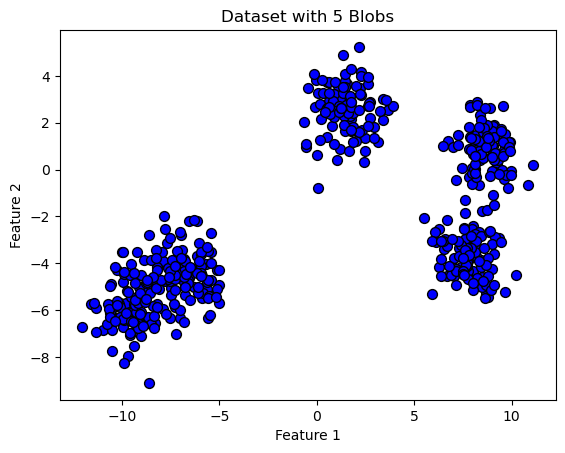

In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create a dataset with 5 clusters
X, y = make_blobs(n_samples=500, centers=5, n_features=2)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title("Dataset with 5 Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

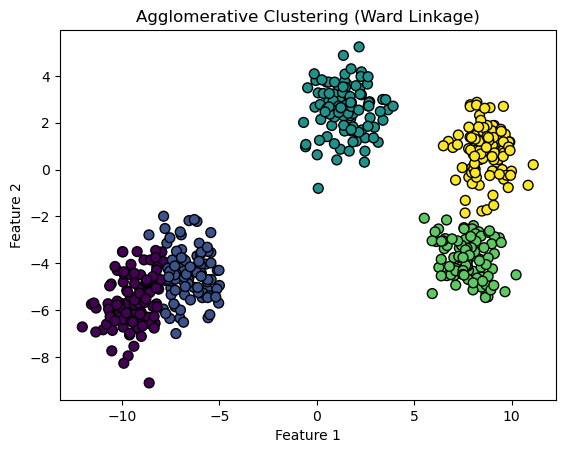

In [50]:
# Import AgglomerativeClustering from sklearn
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering model
# We set n_clusters=5 to force the algorithm to stop at 5 clusters
agg_clustering = AgglomerativeClustering(linkage='ward', n_clusters=5)

# Fit the model to the dataset and predict cluster labels
labels = agg_clustering.fit_predict(X)

# Plot the resulting clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Agglomerative Clustering (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

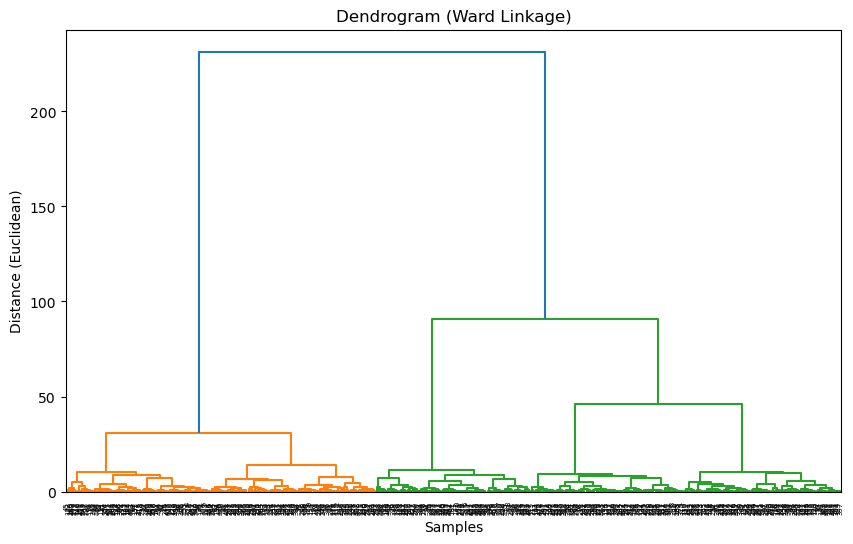

In [51]:
# Import libraries for the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering and create the linkage matrix
Z = linkage(X, method='ward')  # 'ward' minimizes the variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance (Euclidean)")
plt.show()


### Advantages of Hierarchical Clustering

- **No need to specify K**: Hierarchical clustering doesn't require you to specify the number of clusters upfront.
- **Dendrogram provides insights**: The dendrogram helps visualize how data points are grouped and can be used to choose the optimal number of clusters.
- **Works for various shapes**: Hierarchical clustering can work well for data with complex, non-convex shapes.

### Limitations of Hierarchical Clustering

- **Computational complexity**: Hierarchical clustering is computationally expensive, especially for large datasets. The time complexity is typically $O(n^2)$, where $n$ is the number of data points.
- **No reassignment of points**: Once a data point is assigned to a cluster, it cannot be reassigned. This can lead to suboptimal results in certain cases.
